## An inferential problem: The Gender Wage Gap

In the previous lab, we already analyzed data from the March Supplement of the U.S. Current Population Survey (2015) and answered the question how to use job-relevant characteristics, such as education and experience, to best predict wages. Now, we focus on the following inference question:

What is the difference in predicted wages between men and women with the same job-relevant characteristics?

Thus, we analyze if there is a difference in the payment of men and women (*gender wage gap*). The gender wage gap may partly reflect *discrimination* against women in the labor market or may partly reflect a *selection effect*, namely that women are relatively more likely to take on occupations that pay somewhat less (for example, school teaching).

To investigate the gender wage gap, we consider the following log-linear regression model

\begin{align}
\log(Y) &= \beta'X + \epsilon\\
&= \beta_1 D  + \beta_2' W + \epsilon,
\end{align}

where $D$ is the indicator of being female ($1$ if female and $0$ otherwise) and the
$W$'s are controls explaining variation in wages. Considering transformed wages by the logarithm, we are analyzing the relative difference in the payment of men and women.

In [81]:
library('dplyr') # filter dataset

In [82]:
load("../../data/wage2015_subsample_inference.Rdata")
dim(data)

[1] 5150   20

In [83]:
attach(data) 

The following objects are masked from data (pos = 9):

    ad, clg, exp1, exp2, exp3, exp4, hsg, ind, ind2, lwage, mw, ne,
    occ, occ2, scl, sex, shs, so, wage, we


The following objects are masked from data (pos = 10):

    ad, clg, exp1, exp2, exp3, exp4, hsg, ind, ind2, lwage, mw, ne,
    occ, occ2, scl, sex, shs, so, wage, we




In [84]:
head(data)

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
10,9.615385,2.263364,1,0,0,0,1,0,0,0,0,1,7,0.49,0.343,0.2401,3600,11,8370,18
12,48.076923,3.872802,0,0,0,0,1,0,0,0,0,1,31,9.61,29.791,92.3521,3050,10,5070,9
15,11.057692,2.403126,0,0,1,0,0,0,0,0,0,1,18,3.24,5.832,10.4976,6260,19,770,4
18,13.942308,2.634928,1,0,0,0,0,1,0,0,0,1,25,6.25,15.625,39.0625,420,1,6990,12
19,28.846154,3.361977,1,0,0,0,1,0,0,0,0,1,22,4.84,10.648,23.4256,2015,6,9470,22
30,11.730769,2.462215,1,0,0,0,1,0,0,0,0,1,1,0.01,0.001,0.0001,1650,5,7460,14


***Variable description***

- occ : occupational classification
- ind : industry classification
- lwage : log hourly wage
- sex : gender (1 female) (0 male)
- shs : some high school
- hsg : High school graduated
- scl : Some College
- clg: College Graduate
- ad: Advanced Degree
- ne: Northeast
- mw: Midwest
- so: South
- we: West
- exp1: experience

In [87]:
str(data)

'data.frame':	5150 obs. of  20 variables:
 $ wage : num  9.62 48.08 11.06 13.94 28.85 ...
 $ lwage: num  2.26 3.87 2.4 2.63 3.36 ...
 $ sex  : num  1 0 0 1 1 1 1 0 1 1 ...
 $ shs  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ hsg  : num  0 0 1 0 0 0 1 1 1 0 ...
 $ scl  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ clg  : num  1 1 0 0 1 1 0 0 0 1 ...
 $ ad   : num  0 0 0 1 0 0 0 0 0 0 ...
 $ mw   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ so   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ we   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ne   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ exp1 : num  7 31 18 25 22 1 42 37 31 4 ...
 $ exp2 : num  0.49 9.61 3.24 6.25 4.84 ...
 $ exp3 : num  0.343 29.791 5.832 15.625 10.648 ...
 $ exp4 : num  0.24 92.35 10.5 39.06 23.43 ...
 $ occ  : Factor w/ 369 levels "10","20","40",..: 159 136 269 23 99 86 226 232 184 146 ...
 $ occ2 : num  11 10 19 1 6 5 17 17 13 10 ...
 $ ind  : Factor w/ 236 levels "370","380","390",..: 204 117 12 165 231 176 171 135 210 201 ...
 $ ind2 : Factor w/ 21 levels "2","3","4","5",..: 17 8 

In [86]:
data$occ2 <- as.numeric(occ2)

In [88]:
# Focus on the subset of college-educated workers

data <- data %>% filter(scl==1 | clg ==1)
dim(data)

[1] 3068   20

In [90]:
#install.packages('ggplot2')

library(ggplot2)

In [91]:
data <- data %>% mutate(gender = ifelse(sex == 1 , "Women", "Men"))

### 1.0 Main statistics 

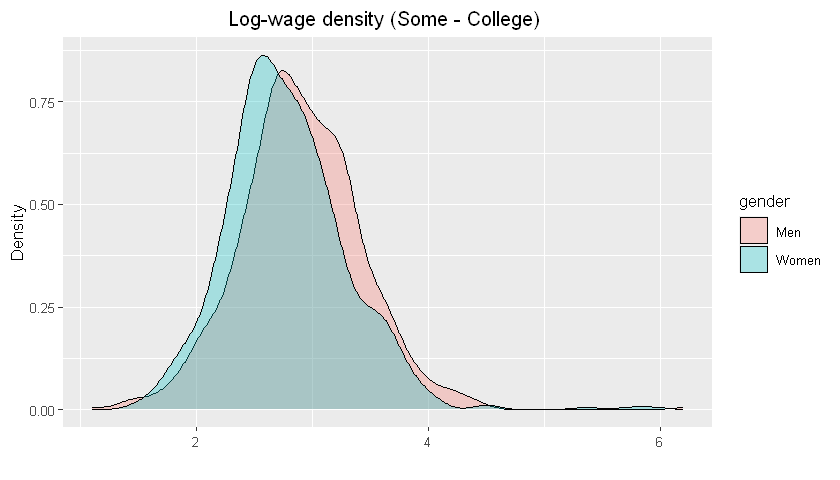

In [92]:
data %>% filter(scl == 1) %>%  # scl some college 
ggplot(aes(x=lwage, fill = gender , colour=gender)) +
  geom_density(alpha=0.3, color = "black") +
ggtitle("Log-wage density (Some - College) ") + theme(text=element_text(size =10), plot.title = element_text(hjust = 0.5)) +
labs(x = "", 
     y = "Density")

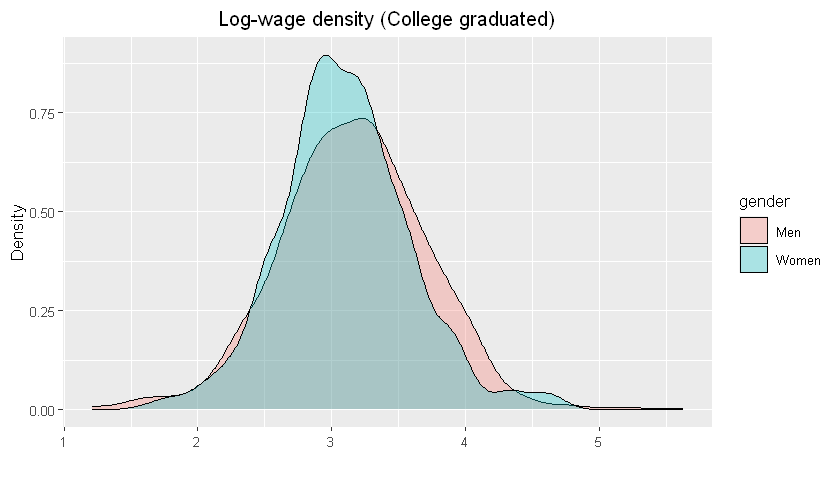

In [93]:
data %>% filter(clg == 1) %>%
ggplot(aes(x=lwage, fill = gender , colour=gender)) +
  geom_density(alpha=0.3, color = "black") +
ggtitle("Log-wage density (College graduated)") + theme(text=element_text(size =10), plot.title = element_text(hjust = 0.5)) +
labs(x = "", 
     y = "Density")

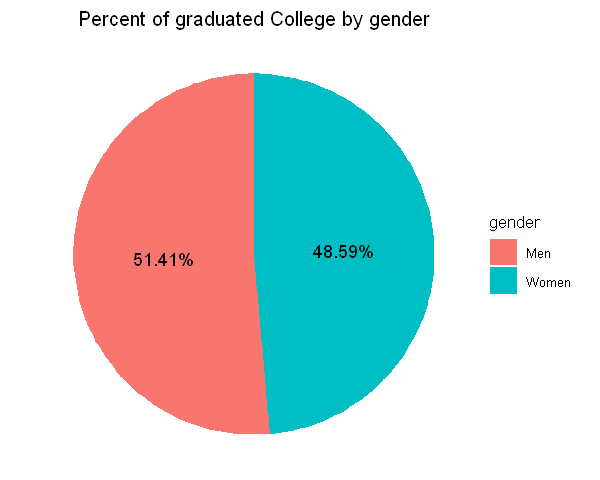

In [13]:
options(repr.plot.width = 5, repr.plot.height =4) 

data %>% mutate(total = sum(clg)) %>%
        group_by(gender) %>% 
                    summarise(clg_total = sum(clg), total = mean(total)) %>% 
        mutate(var1 = (clg_total/total)*100 )  %>%
        ggplot(aes(x="", y=var1, fill=gender)) +
          geom_bar(stat="identity", width=1) +
          coord_polar("y", start=0) +
          theme_void() +
        geom_text(aes(label = paste0(round(var1,2), "%")), position = position_stack(vjust=0.5)) + 
            labs(title = "Percent of graduated College by gender") + theme(text=element_text(size =10), plot.title = element_text(hjust = 0.5))

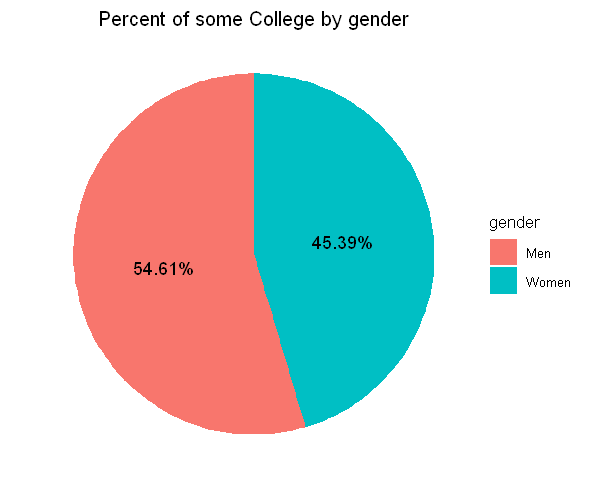

In [14]:
options(repr.plot.width = 5, repr.plot.height =4) 

data %>% mutate(total = sum(scl)) %>%
        group_by(gender) %>% 
                    summarise(clg_total = sum(scl), total = mean(total)) %>% 
        mutate(var1 = (clg_total/total)*100 )  %>%
        ggplot(aes(x="", y=var1, fill=gender)) +
          geom_bar(stat="identity", width=1) +
          coord_polar("y", start=0) +
          theme_void() +
        geom_text(aes(label = paste0(round(var1,2), "%")), position = position_stack(vjust=0.5)) + 
            labs(title = "Percent of some College by gender") + theme(text=element_text(size =10), plot.title = element_text(hjust = 0.5))

### 1.0 Linear Regression

In [94]:
library(sandwich)

In [99]:
nocontrol.fit <- lm(lwage ~ sex)
summary(nocontrol.fit)$coef["sex",1]

[1] -0.03834473

In [101]:
HCV.coefs <- vcovHC(nocontrol.fit, type = 'HC')
diag(HCV.coefs)

(Intercept)          sex 
0.0001182613 0.0002528715

In [102]:
nocontrol.fit <- lm(lwage ~ sex)

nocontrol.est <- summary(nocontrol.fit)$coef["sex",1]

HCV.coefs <- vcovHC(nocontrol.fit, type = 'HC');
nocontrol.se <- sqrt(diag(HCV.coefs))[2] # Estimated std errors

# print unconditional effect of gender and the corresponding standard error
cat ("The estimated gender coefficient is",nocontrol.est," and the corresponding robust standard error is",nocontrol.se) 


The estimated gender coefficient is -0.03834473  and the corresponding robust standard error is 0.01590194

Next, we run an ols regression of $Y$ on $(D,W)$ to control for the effect of covariates summarized in $W$:

\begin{align}
\log(Y) &=\beta_1 D  + \beta_2' W + \epsilon.
\end{align}

Here, we are considering the flexible model from the previous lab. Hence, $W$ controls for experience, education, region, and occupation and industry indicators plus transformations and two-way interactions.

In [24]:
# Ols regression with controls

flex <- lwage ~ sex + (exp1+exp2+exp3+exp4)*(clg+factor(occ2)+ind2+mw+so+we)

#   Note that ()*() operation in formula objects in R creates a formula of the sort:
#  (exp1+exp2+exp3+exp4)+ (shs+hsg+scl+clg+occ2+ind2+mw+so+we) +  (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)
#  This is not intuitive at all, but that's what it does.

control.fit <- lm(flex, data=data)
control.est <- summary(control.fit)$coef[2,1]


HCV.coefs <- vcovHC(control.fit, type = 'HC');
control.se <- sqrt(diag(HCV.coefs))[2] # Estimated std errors

cat ("The estimated gender coefficient is",control.est," and the corresponding robust standard error is",control.se) 

The estimated gender coefficient is -0.05306234  and the corresponding robust standard error is 0.01835285

In [25]:
summary(control.fit)


Call:
lm(formula = flex, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.87897 -0.27894 -0.00777  0.25823  2.85755 

Coefficients: (1 not defined because of singularities)
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          3.4357559  0.5208785   6.596 5.02e-11 ***
sex                 -0.0530623  0.0193532  -2.742 0.006149 ** 
exp1                -0.1962420  0.1996670  -0.983 0.325767    
exp2                 4.3105015  2.3797581   1.811 0.070197 .  
exp3                -2.3067253  1.0176306  -2.267 0.023480 *  
exp4                 0.3513392  0.1382879   2.541 0.011118 *  
clg                  0.2498673  0.1237850   2.019 0.043627 *  
factor(occ2)2        0.2151993  0.1582208   1.360 0.173900    
factor(occ2)3        0.0487642  0.2095297   0.233 0.815986    
factor(occ2)4        0.0281449  0.2300084   0.122 0.902619    
factor(occ2)5       -0.2711807  0.3944166  -0.688 0.491793    
factor(occ2)6       -0.2000530  0.2705614  -0

In [27]:
#install.packages('xtable')

library(lmtest)
library(xtable)

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [29]:
table<- matrix(0, 2, 4)
table[1,1]<- nocontrol.est  
table[1,2]<- nocontrol.se   
table[2,1]<- control.est
table[2,2]<- control.se    
table[1,3]<- coefci(nocontrol.fit, df = Inf, vcov. = vcovHC, type = "HC")[2,1] 
table[1,4]<- coefci(nocontrol.fit, df = Inf, vcov. = vcovHC, type = "HC")[2,2] 
table[2,3]<- coefci(control.fit, df = Inf, vcov. = vcovHC, type = "HC")[2,1] 
table[2,4]<- coefci(control.fit, df = Inf, vcov. = vcovHC, type = "HC")[2,2] 

colnames(table)<- c("Estimate","se","lower_bound","upper_bound")
rownames(table)<- c("OLS", "OLS with control")
tab<- xtable(table)
tab

,Estimate,se,lower_bound,upper_bound
,<dbl>,<dbl>,<dbl>,<dbl>
OLS,-0.08150856,0.01957965,-0.11988396,-0.04313315
OLS with control,-0.05306234,0.01835285,-0.08903326,-0.01709142


In [33]:
#library(stargazer)

In [103]:
stargazer(tab)


% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: vie., may. 27, 2022 - 09:21:40 p. m.
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lccccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
Statistic & \multicolumn{1}{c}{N} & \multicolumn{1}{c}{Mean} & \multicolumn{1}{c}{St. Dev.} & \multicolumn{1}{c}{Min} & \multicolumn{1}{c}{Max} \\ 
\hline \\[-1.8ex] 
Estimate & 2 & $-$0.067 & 0.020 & $-$0.082 & $-$0.053 \\ 
se & 2 & 0.019 & 0.001 & 0.018 & 0.020 \\ 
lower\_bound & 2 & $-$0.104 & 0.022 & $-$0.120 & $-$0.089 \\ 
upper\_bound & 2 & $-$0.030 & 0.018 & $-$0.043 & $-$0.017 \\ 
\hline \\[-1.8ex] 
\end{tabular} 
\end{table} 


In [104]:
stargazer(nocontrol.fit,control.fit,
          type = "text", 
          column.labels = c("Baseline Model", "Model with controls"),  dep.var.labels=c("Log - real wage"), 
          covariate.labels=c("Gender","Experience","Experience 2", "Experience 3","Experience 4"), out="models.txt",
          title="Results",align=TRUE          )


Results
                                  Dependent variable:               
                    ------------------------------------------------
                                    Log - real wage                 
                        Baseline Model        Model with controls   
                             (1)                      (2)           
--------------------------------------------------------------------
Gender                     -0.038**                -0.053***        
                           (0.016)                  (0.019)         
                                                                    
Experience                                          -0.196          
                                                    (0.200)         
                                                                    
Experience 2                                        4.311*          
                                                    (2.380)         
                         

In [61]:
stargazer(nocontrol.fit,control.fit, keep = c("sex"), type = "text",
          column.labels = c("Baseline Model", "Model with controls"),  dep.var.labels=c("Log - real wage"), 
          covariate.labels=c("Gender","Experience","Experience 2", "Experience 3","Experience 4"),
          title="Results")


Results
                                   Dependent variable:                
                    --------------------------------------------------
                                     Log - real wage                  
                         Baseline Model         Model with controls   
                              (1)                       (2)           
----------------------------------------------------------------------
Gender                     -0.082***                 -0.053***        
                            (0.020)                   (0.019)         
                                                                      
----------------------------------------------------------------------
Observations                 3,068                     3,068          
R2                           0.006                     0.330          
Adjusted R2                  0.005                     0.275          
Residual Std. Error    0.543 (df = 3066)         0.463 (df = 2838)  

In [62]:
# drop type = text  to get latex 

stargazer(nocontrol.fit,control.fit, keep = c("sex"),
          column.labels = c("Baseline Model", "Model with controls"),  dep.var.labels=c("Log - real wage"), 
          covariate.labels=c("Gender","Experience","Experience 2", "Experience 3","Experience 4"),
          title="Results",align=TRUE)


% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: vie., may. 27, 2022 - 06:41:42 p. m.
% Requires LaTeX packages: dcolumn 
\begin{table}[!htbp] \centering 
  \caption{Results} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lD{.}{.}{-3} D{.}{.}{-3} } 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{2}{c}{\textit{Dependent variable:}} \\ 
\cline{2-3} 
\\[-1.8ex] & \multicolumn{2}{c}{Log - real wage} \\ 
 & \multicolumn{1}{c}{Baseline Model} & \multicolumn{1}{c}{Model with controls} \\ 
\\[-1.8ex] & \multicolumn{1}{c}{(1)} & \multicolumn{1}{c}{(2)}\\ 
\hline \\[-1.8ex] 
 Gender & -0.082^{***} & -0.053^{***} \\ 
  & (0.020) & (0.019) \\ 
  & & \\ 
\hline \\[-1.8ex] 
Observations & \multicolumn{1}{c}{3,068} & \multicolumn{1}{c}{3,068} \\ 
R$^{2}$ & \multicolumn{1}{c}{0.006} & \multicolumn{1}{c}{0.330} \\ 
Adjusted R$^{2}$ & \multicolumn{1}{c}{0.005} & \multicolumn{1}{c}{0.275} \\ 
Residual Std. Error & \

In [108]:
tab

,Estimate,se,lower_bound,upper_bound
,<dbl>,<dbl>,<dbl>,<dbl>
OLS,-0.08150856,0.01957965,-0.11988396,-0.04313315
OLS with control,-0.05306234,0.01835285,-0.08903326,-0.01709142


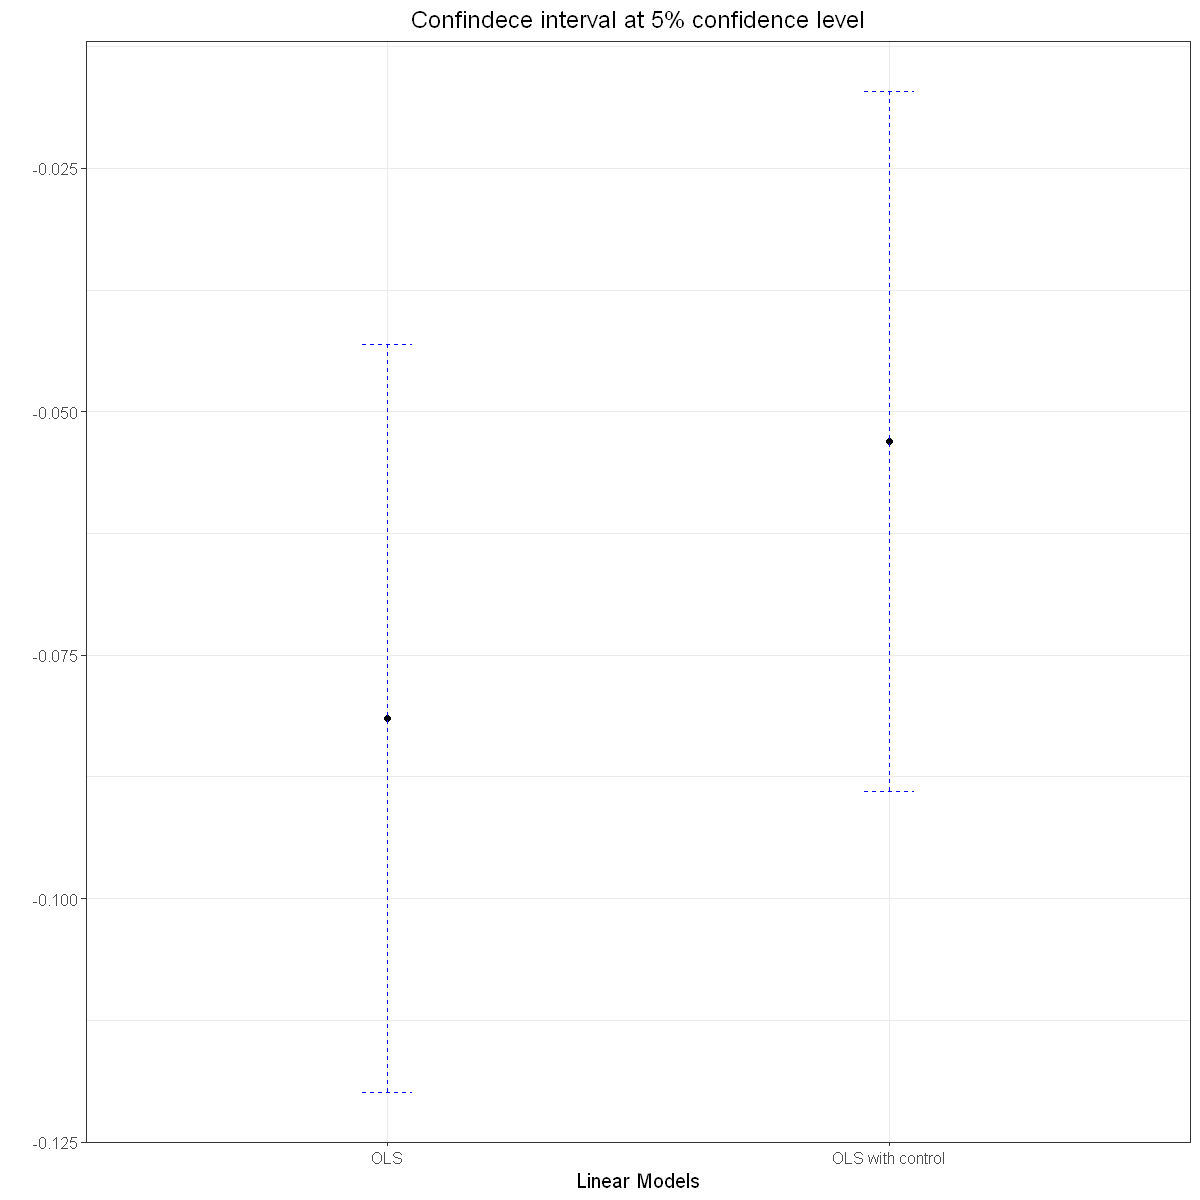

In [117]:
options(repr.plot.width = 10, repr.plot.height =10)  # plot size 

ggplot(tab, aes(x=rownames(tab), y=Estimate)) +
    geom_point(size=1.5) + 
    geom_errorbar(aes(ymin=lower_bound, ymax=upper_bound) , width = 0.1,color="blue", linetype="dashed") + 
  labs(x="Linear Models", y="") + ggtitle("Confindece interval at 5% confidence level") +
  theme_bw()  + theme(text=element_text(size =12), plot.title = element_text(hjust = 0.5))

# Graph: Experience profile and log-wage

The task is to replicate the Figure 11.10 from Lemieux (2006) considering that "you will have only two plotted lines for this college-educated workers". It means we have to plot using the subset of the original data.

A first way is to collapse the data to plot the mean of log-wages for each year of experience. To do so, we first estimate the logwage by a quafratic and quartic expressions, and then we clean the data to plot.

In [118]:
data <- data %>% filter(clg == 1)

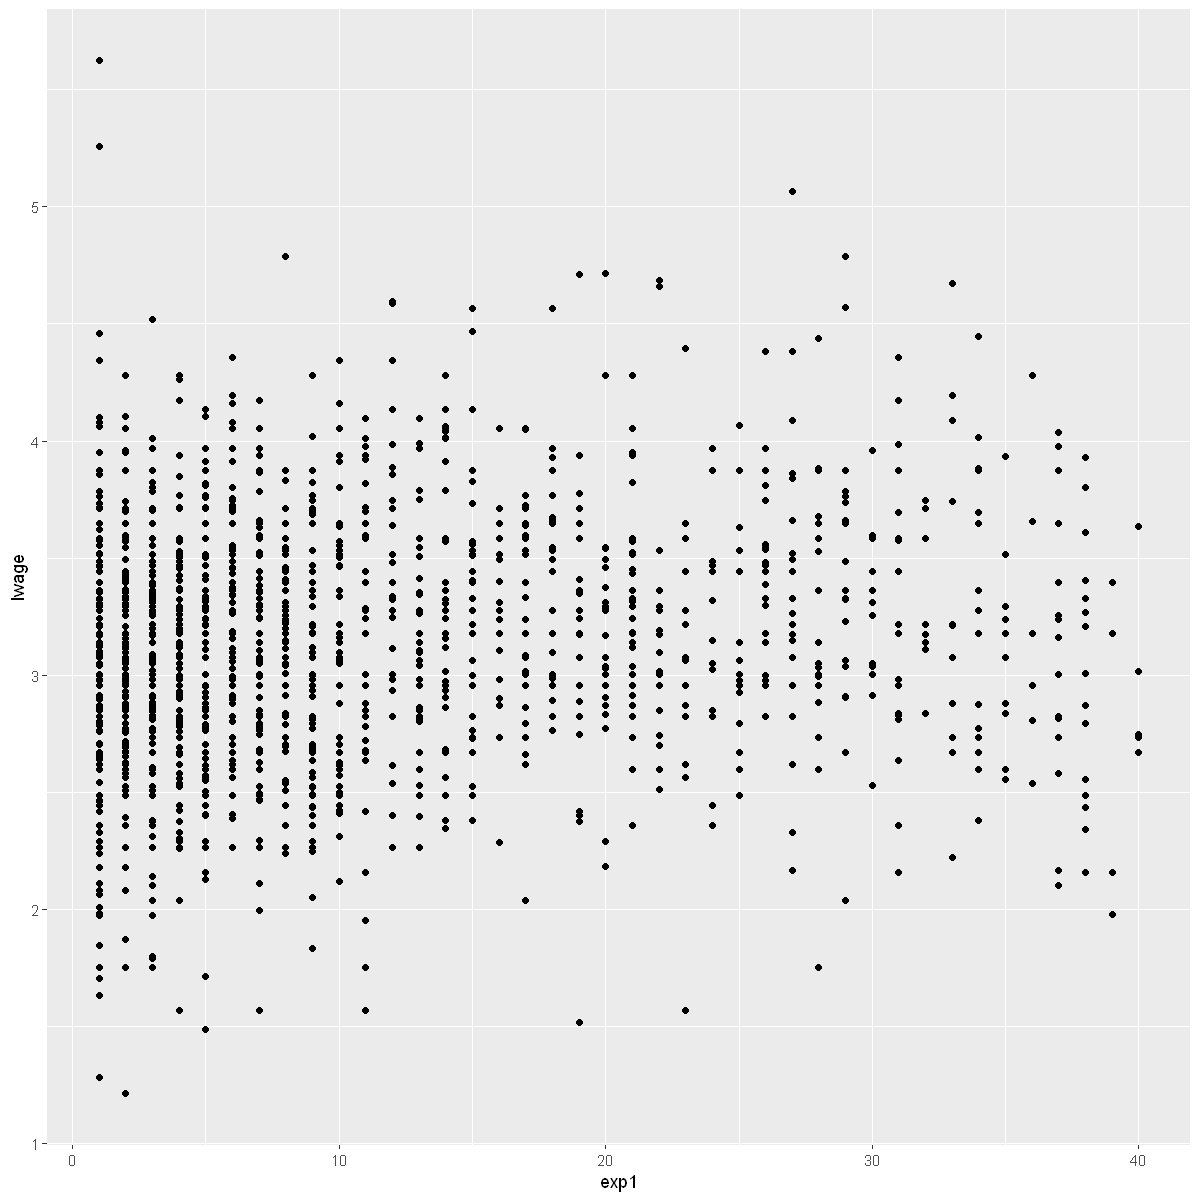

In [119]:
ggplot(z_clg, aes(y = lwage, x = exp1)) + geom_point()

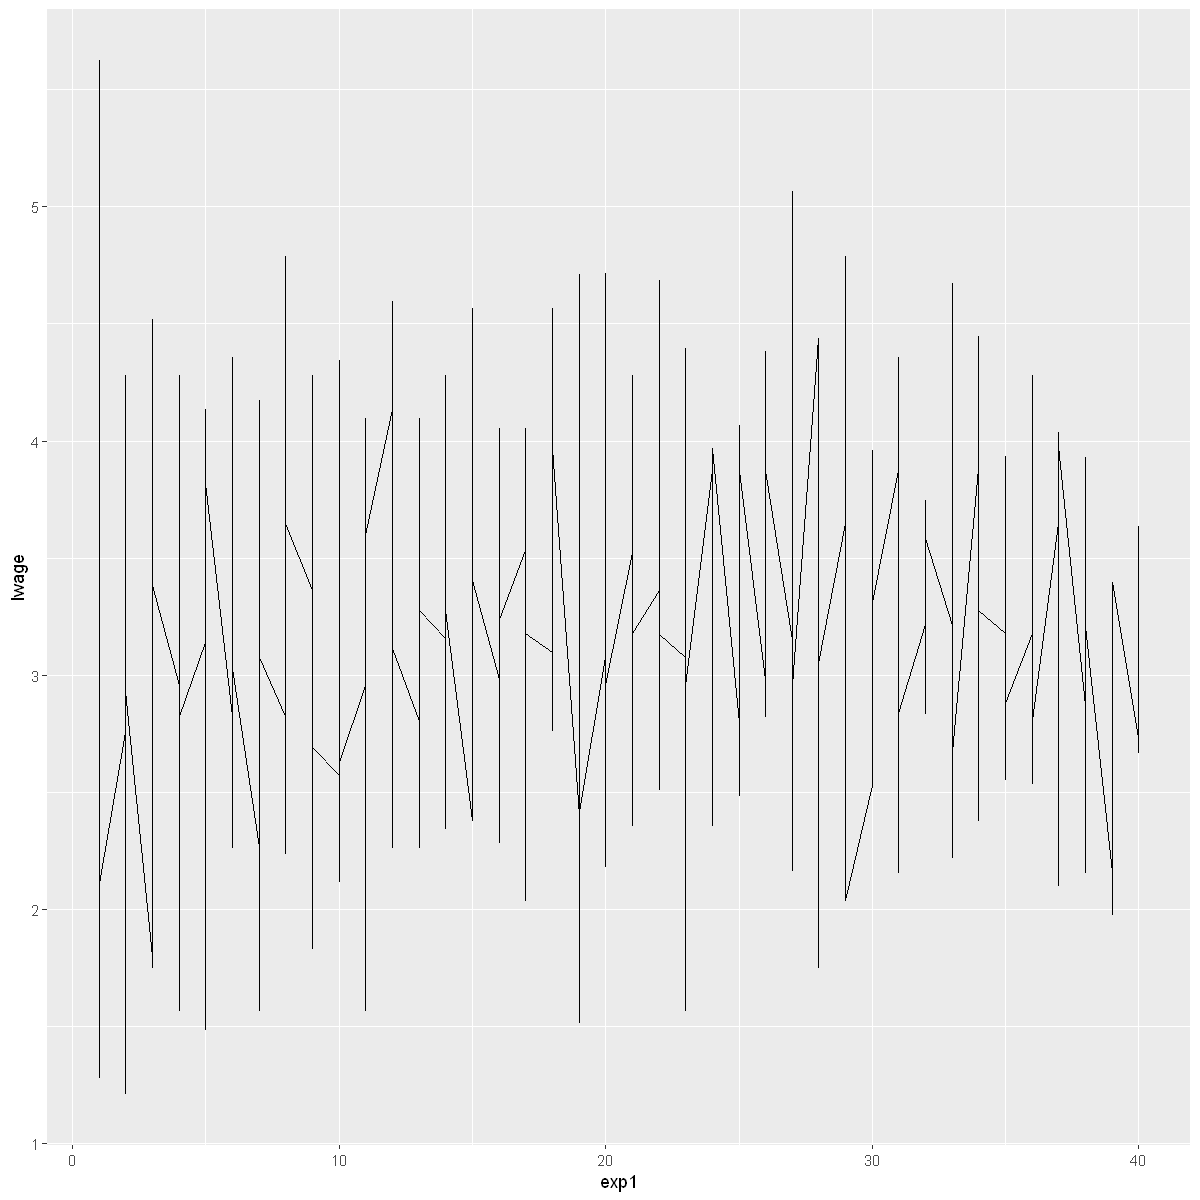

In [120]:
ggplot(z_clg, aes(y = lwage, x = exp1)) + geom_line()

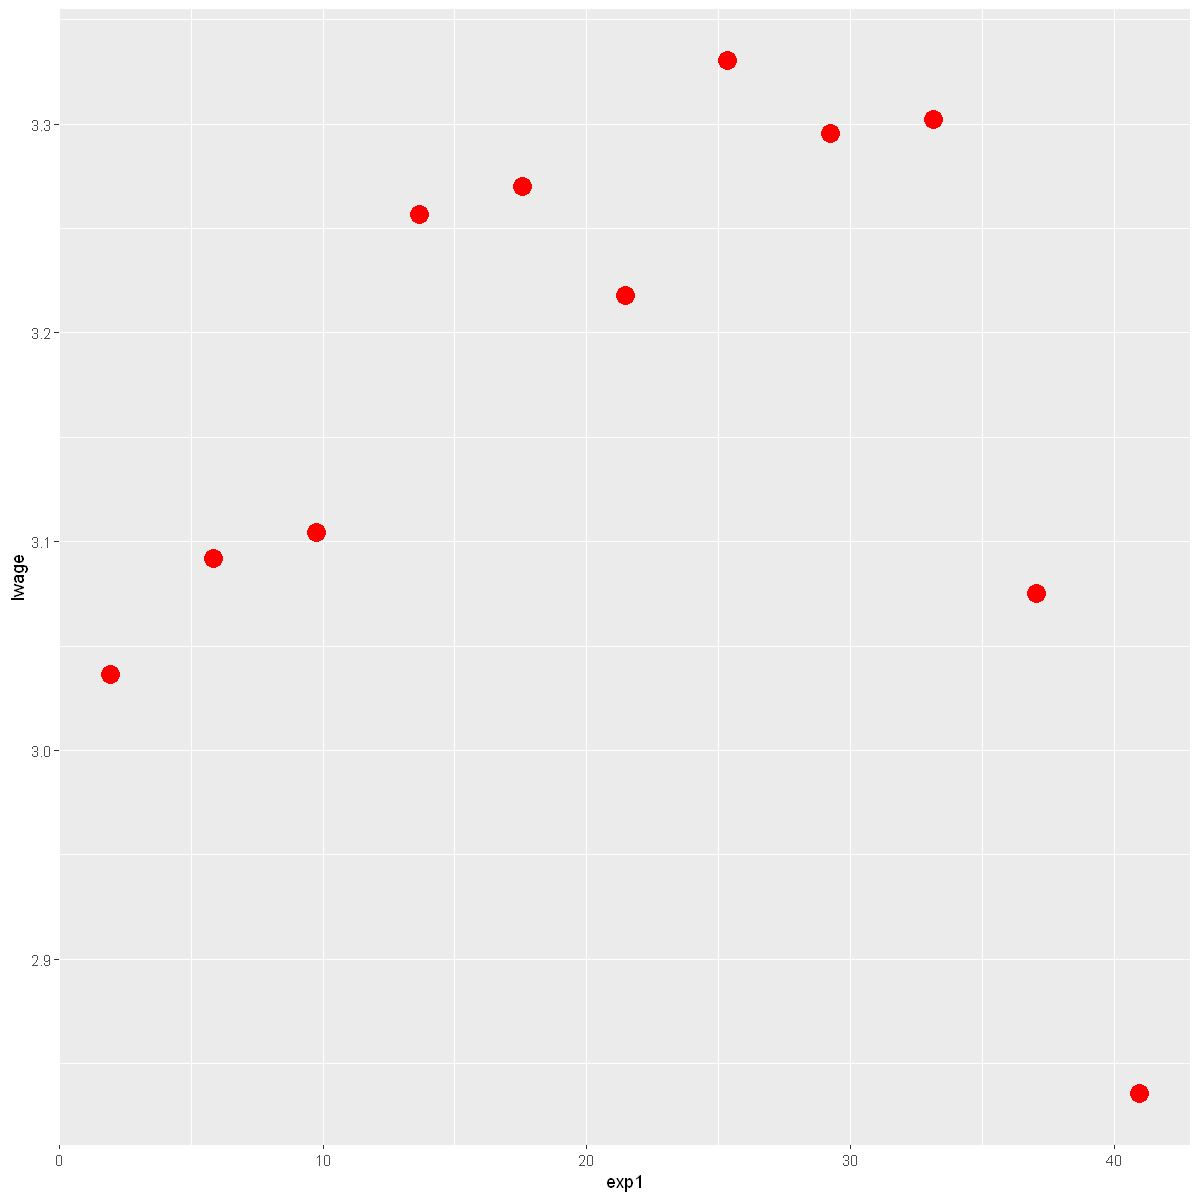

In [129]:
options(repr.plot.width = 10, repr.plot.height =10)  # plot size

ggplot(NULL,aes(exp1,lwage)) +
stat_summary_bin(data=z_clg, fun='mean', bins=10, color='red', size=5, geom='point') 

In [68]:
quartic   <- lwage ~  exp1+exp2+exp3+exp4
quadratic <- lwage ~  exp1+exp2

# quartic
quartic_pred <- predict(lm(quartic, data=data))  # lm(arg1 = formula, data)

# quadratic
quadratic_pred <- predict(lm(quadratic, data=data))

# adding predictions
z_clg <- data %>% mutate(lwage_quartic = quartic_pred)

z_clg <- z_clg %>% mutate(lwage_quadratic = quadratic_pred)



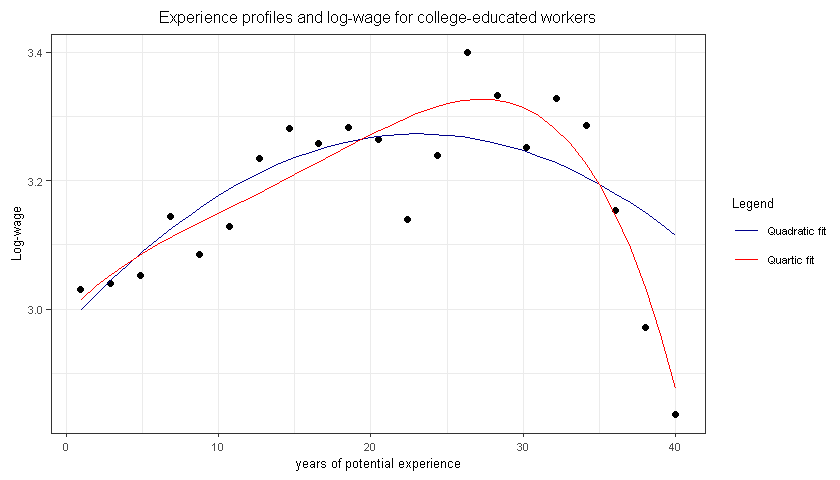

In [79]:
options(repr.plot.width = 7, repr.plot.height =4) 


ggplot(NULL,aes(exp1,lwage)) +
stat_summary_bin(data=z_clg, fun='mean', bins=20, color='black', size=1.5, geom='point') +
geom_line(data=z_clg, aes(x=exp1, y=lwage_quadratic, colour="darkblue", )) + 
geom_line(data=z_clg, aes(x=exp1, y=lwage_quartic, colour="red")) +
labs(x = "years of potential experience", 
     y = "Log-wage", 
     title = "Experience profiles and log-wage for college-educated workers") +
theme(legend.key.height = unit(1, 'cm')) +
scale_color_identity(name = "Legend", labels = c("Quadratic fit", "Quartic fit"),
                     guide = "legend")+
  theme_bw() + theme(text=element_text(size =8), plot.title = element_text(hjust = 0.5))

It is clear that the relation between experiencie and log-wage fits better to the quartic prediction.

In [34]:
# cleaning data to plot
graph_2 <- z_clg %>% group_by(exp1, clg) %>% 
  summarise_at(vars(lwage, lwage_quartic, lwage_quadratic), mean)
names(graph_2)

[1] "exp1"            "clg"             "lwage"           "lwage_quartic"  
[5] "lwage_quadratic"